In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

In [ ]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

In [327]:
os.chdir("/gdrive/MyDrive/Projects/Delhi Weather Classification")

In [328]:
data = pd.read_csv("data.csv")

In [329]:
data.shape

(100990, 20)

In [330]:
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [331]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [332]:
data.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [333]:
data.corr()

<ipython-input-333-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
_dewptm,1.000000,-0.217862,0.003518,0.447637,0.314661,NaN,-0.003905,0.144202,0.004140,0.527915,0.067826,-0.000153,0.010339,-0.159256,-0.088603,0.346463,-0.006930
_fog,-0.217862,1.000000,-0.003106,-0.003694,0.378691,NaN,-0.000875,-0.044947,-0.000861,-0.450534,-0.026700,-0.001218,-0.023019,-0.095019,NaN,-0.015488,-0.100472
_hail,0.003518,-0.003106,1.000000,NaN,0.007513,NaN,-0.000033,-0.001863,-0.000036,-0.002877,0.107280,-0.000050,-0.000475,0.005228,-0.002996,NaN,0.003026
_heatindexm,0.447637,-0.003694,NaN,1.000000,-0.044930,NaN,-0.003068,-0.075930,NaN,0.726131,-0.048912,0.002158,-0.002240,0.103451,-0.125972,NaN,0.069788
_hum,0.314661,0.378691,0.007513,-0.044930,1.000000,NaN,-0.005725,0.172021,0.004390,-0.589912,0.073436,-0.000921,-0.025159,-0.336648,0.056811,-0.039568,-0.230726
_precipm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_pressurem,-0.003905,-0.000875,-0.000033,-0.003068,-0.005725,NaN,1.000000,-0.000532,-0.000009,0.004684,-0.000330,-0.000013,0.000170,0.004538,-0.006100,-0.014467,-0.000150
_rain,0.144202,-0.044947,-0.001863,-0.075930,0.172021,NaN,-0.000532,1.000000,-0.000517,-0.007418,0.422295,-0.000731,-0.004115,-0.022441,0.136379,NaN,0.034911
_snow,0.004140,-0.000861,-0.000036,NaN,0.004390,NaN,-0.000009,-0.000517,1.000000,0.000204,-0.000307,-0.000014,-0.000062,0.002453,NaN,NaN,0.000433
_tempm,0.527915,-0.450534,-0.002877,0.726131,-0.589912,NaN,0.004684,-0.007418,0.000204,1.000000,0.000298,0.001342,0.033270,0.156525,-0.136216,0.880264,0.224876


In [334]:
data.nunique()

datetime_utc    100990
 _conds             39
 _dewptm            51
 _fog                2
 _hail               2
 _heatindexm       193
 _hum              100
 _precipm            0
 _pressurem        139
 _rain               2
 _snow               2
 _tempm             50
 _thunder            2
 _tornado            2
 _vism              48
 _wdird             63
 _wdire             17
 _wgustm            22
 _windchillm        20
 _wspdm             90
dtype: int64

In [335]:
data.columns = ["datetime_utc", "conds", "dewptm", "fog", "hail", "heatindexm", "hum", "precipm", "pressurem", "rain", "snow", "tempm", "thunder", "tornado", "vism", "wdird", "wdire", "wgustm", "windchillm", "wspdm"]

In [336]:
data["wgustm"].unique()

array([ nan, 50. , 31.5, 27.8, 37. , 40.7, 44.4, 33.3, 46.3, 35.2, 51.9,
       55.6, 29.6, 59.3, 64.8, 74.1, 25.9, 48.2, 42.6, 38.9, 83.3, 92.6,
       63. ])

##Data Plotting

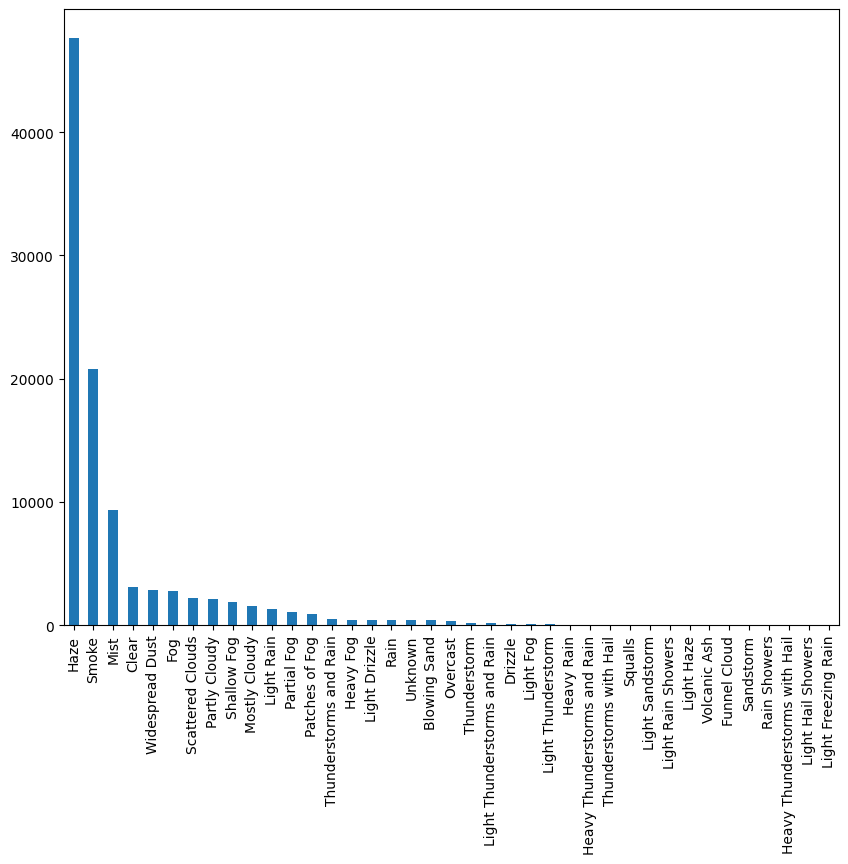

In [337]:
plt.figure(figsize=(10,8))
plt1 = data.conds.value_counts().plot(kind="bar")
plt.show()

some weathers are very low, this could effect result of model's

In [338]:
data.conds.value_counts()

Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Fog                           64
Light Thunderstorm                  64
Heavy Rain               

In [339]:
data.rain.unique()

array([0, 1])

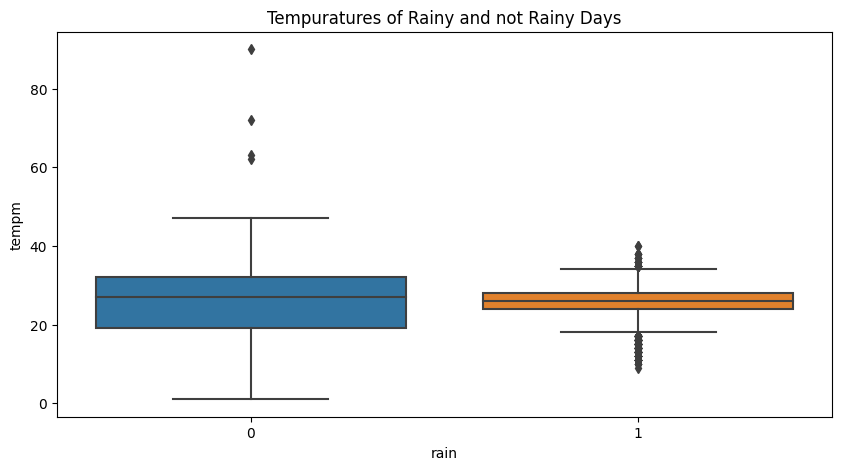

In [340]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data.rain, y=data.tempm)
plt.title("Tempuratures of Rainy and not Rainy Days")
plt.show()

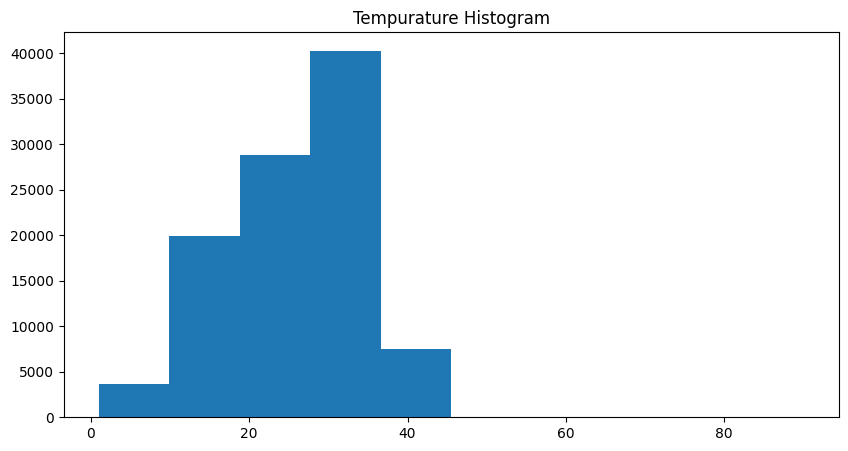

In [341]:
plt.figure(figsize=(10,5))
plt.hist(data.tempm)
plt.title("Tempurature Histogram")
plt.show()

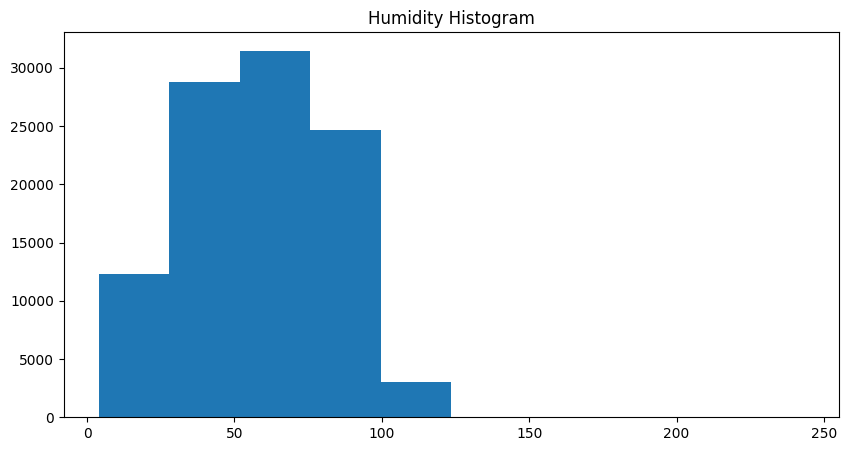

In [342]:
plt.figure(figsize=(10,5))
plt.hist(data.hum)
plt.title("Humidity Histogram")
plt.show()

##Preprocessing

In [343]:
data.head()

,datetime_utc,conds,dewptm,fog,hail,heatindexm,hum,precipm,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wgustm,windchillm,wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [344]:
data.windchillm.unique()

array([nan, 6.2, 3.9, 4. , 6.4, 5.7, 5.2, 3.3, 2.1, 3.7, 4.5, 6.1, 7.3,
       5. , 6.8, 5.3, 4.9, 5.8, 5.5, 4.3, 2.8])

In [345]:
data.isnull().sum()

datetime_utc         0
conds               72
dewptm             621
fog                  0
hail                 0
heatindexm       71835
hum                757
precipm         100990
pressurem          232
rain                 0
snow                 0
tempm              673
thunder              0
tornado              0
vism              4428
wdird            14755
wdire            14755
wgustm           99918
windchillm      100411
wspdm             2358
dtype: int64

In [346]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1   conds         100918 non-null  object 
 2   dewptm        100369 non-null  float64
 3   fog           100990 non-null  int64  
 4   hail          100990 non-null  int64  
 5   heatindexm    29155 non-null   float64
 6   hum           100233 non-null  float64
 7   precipm       0 non-null       float64
 8   pressurem     100758 non-null  float64
 9   rain          100990 non-null  int64  
 10  snow          100990 non-null  int64  
 11  tempm         100317 non-null  float64
 12  thunder       100990 non-null  int64  
 13  tornado       100990 non-null  int64  
 14  vism          96562 non-null   float64
 15  wdird         86235 non-null   float64
 16  wdire         86235 non-null   object 
 17  wgustm        1072 non-null    float64
 18  wind

###Null Values

In [347]:
data = data.drop(["heatindexm", "precipm", "wgustm", "windchillm"], axis=1)

In [348]:
null_percentage = data.isnull().sum() / data.shape[0]
print(null_percentage)

datetime_utc    0.000000
conds           0.000713
dewptm          0.006149
fog             0.000000
hail            0.000000
hum             0.007496
pressurem       0.002297
rain            0.000000
snow            0.000000
tempm           0.006664
thunder         0.000000
tornado         0.000000
vism            0.043846
wdird           0.146104
wdire           0.146104
wspdm           0.023349
dtype: float64


In [349]:
mean = data

In [350]:
null_columns = null_percentage[null_percentage > 0].index
for col in null_columns:
  data[col] = data[col].fillna(mean[col].mode()[0])

In [351]:
data.isnull().sum()

datetime_utc    0
conds           0
dewptm          0
fog             0
hail            0
hum             0
pressurem       0
rain            0
snow            0
tempm           0
thunder         0
tornado         0
vism            0
wdird           0
wdire           0
wspdm           0
dtype: int64

###Edit Time data

In [352]:
data.head()

,datetime_utc,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wspdm
0,19961101-11:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1,19961101-12:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,2.0,0.0,North,0.0
2,19961101-13:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,2.0,0.0,North,0.0
3,19961101-14:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,0.0
4,19961101-16:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0


in here I split datetime column  and used each data type in different column

In [353]:
data[["date", "time"]] = data["datetime_utc"].str.split("-", n=1, expand = True)

In [354]:
data = data.drop("datetime_utc", axis=1)

In [356]:
data["time"] = data["time"].str.replace(":",".")

In [357]:
data["time"] = data["time"].astype(float)

In [358]:
data["year"] = data["date"].str[:4]
data["month"] = data["date"].str[4:6]
data["day"] = data["date"].str[6:]

In [359]:
data = data.drop("date", axis=1)

In [360]:
data["year"] = data["year"].astype(int)
data["month"] = data["month"].astype(int)
data["day"] = data["day"].astype(int)

### Removing low value_count rows

In [361]:
data.conds.value_counts()

Haze                             47674
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Fog                           64
Light Thunderstorm                  64
Heavy Rain               

In [362]:
value_counts = data["conds"].value_counts()
values_to_keep = value_counts[value_counts >= 60].index

In [363]:
data = data[data["conds"].isin(values_to_keep)]

###Label Encoder

In [364]:
le = LabelEncoder()
for column in data.select_dtypes(include="object"):
  data[column] = le.fit_transform(data[column])

In [365]:
data.head()

,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wspdm,time,year,month,day
0,20,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,16,7.4,11.0,1996,11,1
1,20,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,2.0,0.0,7,0.0,12.0,1996,11,1
2,20,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,2.0,0.0,7,0.0,13.0,1996,11,1
3,20,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,7,0.0,14.0,1996,11,1
4,20,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,7,0.0,16.0,1996,11,1


In [366]:
data.corr()

,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wspdm,time,year,month,day
conds,1.000000,-0.297033,0.029805,NaN,-0.003784,-0.002595,0.045923,0.003072,-0.244385,0.114260,NaN,-0.020194,-0.060131,0.012732,-0.070333,-0.016225,-0.112624,0.141993,-0.008832
dewptm,-0.297033,1.000000,-0.214403,NaN,0.324281,-0.003996,0.142253,0.004090,0.526446,0.066365,NaN,0.010263,-0.160131,-0.225125,-0.003840,0.017270,0.110708,0.200790,0.013298
fog,0.029805,-0.214403,1.000000,NaN,0.374261,-0.000874,-0.044457,-0.000862,-0.448466,-0.026240,NaN,-0.021762,-0.105909,0.022783,-0.101584,-0.036810,0.017854,-0.070128,0.002789
hail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hum,-0.003784,0.324281,0.374261,NaN,1.000000,-0.005804,0.168380,0.004304,-0.578355,0.070768,NaN,-0.024677,-0.369838,-0.163327,-0.212390,0.083420,-0.001573,0.080835,0.010831
pressurem,-0.002595,-0.003996,-0.000874,NaN,-0.005804,1.000000,-0.000528,-0.000009,0.004641,-0.000326,NaN,0.000173,0.004575,-0.001401,-0.000082,0.001443,-0.003011,-0.001449,-0.003453
rain,0.045923,0.142253,-0.044457,NaN,0.168380,-0.000528,1.000000,-0.000511,-0.007114,0.421298,NaN,-0.003871,-0.017121,-0.050382,0.033026,-0.020280,0.025769,0.003442,-0.008802
snow,0.003072,0.004090,-0.000862,NaN,0.004304,-0.000009,-0.000511,1.000000,0.000195,-0.000302,NaN,-0.000060,0.002779,0.004536,0.000482,0.001803,0.004921,-0.001431,0.002984
tempm,-0.244385,0.526446,-0.448466,NaN,-0.578355,0.004641,-0.007114,0.000195,1.000000,0.000855,NaN,0.032476,0.208566,-0.032774,0.222377,-0.056864,0.013804,0.074512,0.001780
thunder,0.114260,0.066365,-0.026240,NaN,0.070768,-0.000326,0.421298,-0.000302,0.000855,1.000000,NaN,-0.002428,0.006574,-0.018931,0.041801,0.014444,0.015712,-0.013948,0.001126


In [367]:
data = data.drop("hail", axis = 1)

In [369]:
data = data.drop("tornado", axis = 1)

In [370]:
x = data.drop("conds", axis=1)
y = data["conds"]

In [371]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [372]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, random_state = 0)

##Models

###Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

In [374]:
y_hat_lr = lr.predict(x_test)

In [375]:
mae_lr = mean_absolute_error(y_test, y_hat_lr)
print("mae:",mae_lr)

mse_lr = mean_squared_error(y_test, y_hat_lr)
print("mse:", mse_lr)

accuracy_lr = accuracy_score(y_test, y_hat_lr)
print("accuracy:", accuracy_lr)

mae: 3.4149447381066795
mse: 50.39290004805382
accuracy: 0.7151309466602594


###Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier(random_state = 0, max_depth = 15, min_samples_split = 4, min_samples_leaf = 4, splitter = "best", criterion = "entropy")

dt.fit(x_train, y_train)

In [377]:
y_hat_dt = dt.predict(x_test)

In [378]:
mae_dt = mean_absolute_error(y_test, y_hat_dt)
print("mae:",mae_dt)

mse_dt = mean_squared_error(y_test, y_hat_dt)
print("mse:", mse_dt)

accuracy_dt = accuracy_score(y_test, y_hat_dt)
print("accuracy:", accuracy_dt)

mae: 2.365179000480538
mse: 35.185337578087456
accuracy: 0.801267419509851


###Random Forest classifier

In [ ]:
rf = RandomForestClassifier(criterion = "entropy", max_depth=20, min_samples_split = 10, min_samples_leaf = 10, max_features = "sqrt", class_weight="balanced")
rf.fit(x_train, y_train)

In [380]:
y_hat_rf = rf.predict(x_test)

In [381]:
mae = mean_absolute_error(y_test, y_hat_rf)
print("mae:",mae_dt)

mse = mean_squared_error(y_test, y_hat_rf)
print("mse:", mse_dt)

accuracy = accuracy_score(y_test, y_hat_rf)
print("accuracy:", accuracy_dt)

mae: 2.365179000480538
mse: 35.185337578087456
accuracy: 0.801267419509851


##XGB Classifier

In [ ]:
xgb = XGBClassifier(booster = "gbtree")
xgb.fit(x_train, y_train)

In [383]:
y_hat_xgb = xgb.predict(x_test)

In [384]:
mae = mean_absolute_error(y_test, y_hat_xgb)
print("mae:",mae)

mse = mean_squared_error(y_test, y_hat_xgb)
print("mse:",mse)

accuracy = accuracy_score(y_test, y_hat_xgb)
print("accuracy:", accuracy)

mae: 1.86791206150889
mse: 27.476994233541568
accuracy: 0.8409118212397886


###Gradient Boosting Classifier

In [ ]:
gb = GradientBoostingClassifier(loss = "log_loss", learning_rate = 0.1)
gb.fit(x_train, y_train)

In [386]:
y_hat_gb = gb.predict(x_test)

In [387]:
mae = mean_absolute_error(y_test, y_hat_gb)
print("mae:",mae)

mse = mean_squared_error(y_test, y_hat_gb)
print("mse:", mse)

accuracy = accuracy_score(y_test, y_hat_gb)
print("accuracy:", accuracy)

mae: 2.4029312830370015
mse: 35.79060547813551
accuracy: 0.7996456030754445
